# Exploratory Data Analaysis 
# Python pandas- Olympic-medal-winners-analysis
### Olympics data set- the dataframe is made up of several columns such as the city, the addition, and sport. And each entry, or row, corresponds to a medal that an athlete has won from 1896 to 2008


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [8]:
df = pd.read_csv(r'olympics.csv',skiprows=4)
df.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [9]:
df.tail()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
29211,Beijing,2008,Wrestling,Wrestling Gre-R,"ENGLICH, Mirko",GER,Men,84 - 96kg,M,Silver
29212,Beijing,2008,Wrestling,Wrestling Gre-R,"MIZGAITIS, Mindaugas",LTU,Men,96 - 120kg,M,Bronze
29213,Beijing,2008,Wrestling,Wrestling Gre-R,"PATRIKEEV, Yuri",ARM,Men,96 - 120kg,M,Bronze
29214,Beijing,2008,Wrestling,Wrestling Gre-R,"LOPEZ, Mijain",CUB,Men,96 - 120kg,M,Gold
29215,Beijing,2008,Wrestling,Wrestling Gre-R,"BAROEV, Khasan",RUS,Men,96 - 120kg,M,Silver


### List our Olympics DataFrame.

In [10]:
df

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver
...,...,...,...,...,...,...,...,...,...,...
29211,Beijing,2008,Wrestling,Wrestling Gre-R,"ENGLICH, Mirko",GER,Men,84 - 96kg,M,Silver
29212,Beijing,2008,Wrestling,Wrestling Gre-R,"MIZGAITIS, Mindaugas",LTU,Men,96 - 120kg,M,Bronze
29213,Beijing,2008,Wrestling,Wrestling Gre-R,"PATRIKEEV, Yuri",ARM,Men,96 - 120kg,M,Bronze
29214,Beijing,2008,Wrestling,Wrestling Gre-R,"LOPEZ, Mijain",CUB,Men,96 - 120kg,M,Gold


In [11]:
df.nunique()

City               22
Edition            26
Sport              42
Discipline         56
Athlete         21413
NOC               138
Gender              2
Event             577
Event_gender        3
Medal               3
dtype: int64

### List only the NOC column using both the ['..'] and dot notation. What type is this object?

In [12]:
df['NOC'].head()

0    HUN
1    AUT
2    GRE
3    GRE
4    GRE
Name: NOC, dtype: object

In [13]:
df.NOC.head(5)

0    HUN
1    AUT
2    GRE
3    GRE
4    GRE
Name: NOC, dtype: object

In [14]:
type(df.NOC)

pandas.core.series.Series

### List the Edition, City, Athlete Name and Medal columns. What type is this object?

In [15]:
type(df[['Edition','City','Athlete','Medal']])

pandas.core.frame.DataFrame

In [16]:
df.shape

(29216, 10)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29216 entries, 0 to 29215
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City          29216 non-null  object
 1   Edition       29216 non-null  int64 
 2   Sport         29216 non-null  object
 3   Discipline    29216 non-null  object
 4   Athlete       29216 non-null  object
 5   NOC           29216 non-null  object
 6   Gender        29216 non-null  object
 7   Event         29216 non-null  object
 8   Event_gender  29216 non-null  object
 9   Medal         29216 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.2+ MB


# Which are the most successful cities of all times in the Olympics?

In [18]:
top10 = df.City.value_counts().head(10)
top10

Athens         2149
Los Angeles    2074
Beijing        2042
Sydney         2015
Atlanta        1859
Barcelona      1705
London         1618
Seoul          1546
Paris          1396
Moscow         1387
Name: City, dtype: int64

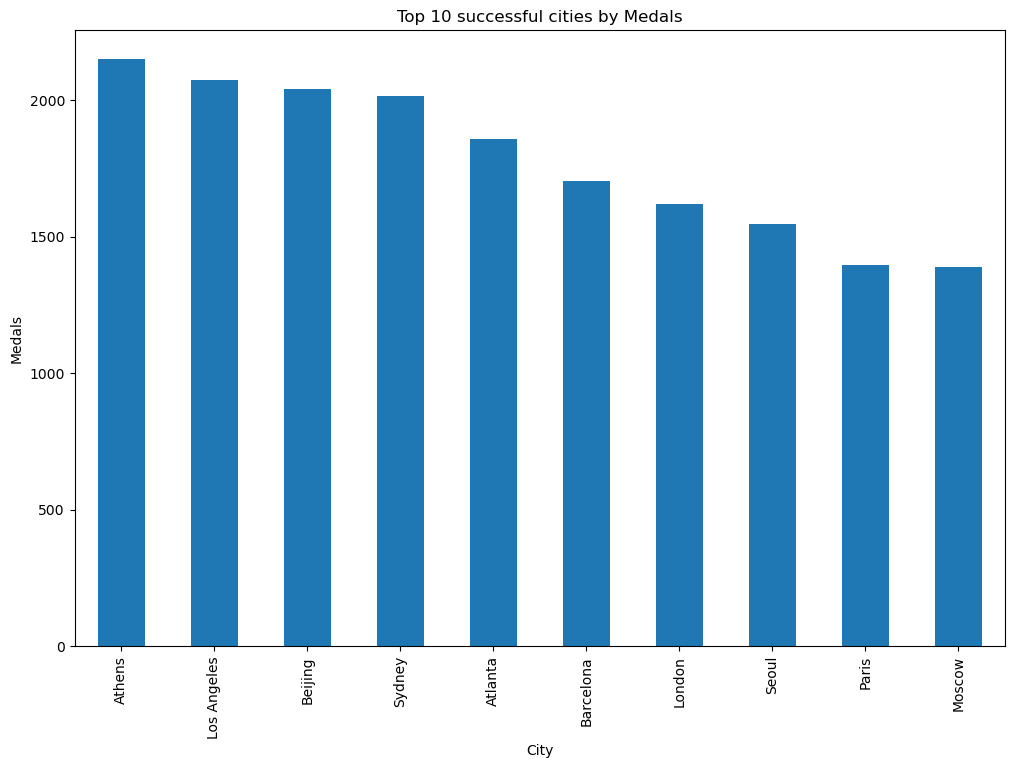

In [19]:
top10.plot(kind = "bar", figsize=(12, 8))
plt.title("Top 10 successful cities by Medals")
plt.xlabel("City")
plt.ylabel("Medals")
plt.show()

# Top 10 games 

In [45]:
df.Event.value_counts().head(10)

football                    1387
hockey                      1325
team competition            1018
basketball                   940
eight with coxswain (8+)     918
handball                     886
water polo                   880
volleyball                   862
team                         809
4x100m relay                 504
Name: Event, dtype: int64

TOP 10 Games are football , hockey , team competition ,eight with coxswain (8+),handball ,water polo,volleyball etc

# Medals per city 

In [47]:
medals_per_city = pd.crosstab(index = df.City, columns = df.Medal, 
                                 margins = True, margins_name = "Total")

In [48]:
medals_per_city

Medal,Bronze,Gold,Silver,Total
City,,,,
Amsterdam,242,229,239,710
Antwerp,355,497,446,1298
Athens,719,723,707,2149
Atlanta,634,615,610,1859
Barcelona,596,558,551,1705
Beijing,710,669,663,2042
Berlin,282,299,294,875
Helsinki,299,300,290,889
London,479,587,552,1618


In [51]:
medals_per_city.rank(ascending = False).head(10)

Medal,Bronze,Gold,Silver,Total
City,,,,
Amsterdam,21.0,21.0,21.0,21.0
Antwerp,13.0,9.0,11.0,12.0
Athens,1.0,1.0,1.0,1.0
Atlanta,5.0,5.0,5.0,5.0
Barcelona,6.0,7.0,7.0,6.0
Beijing,2.0,3.0,4.0,3.0
Berlin,20.0,18.0,17.0,20.0
Helsinki,17.0,17.0,18.5,16.0
London,8.0,6.0,6.0,7.0


<Axes: xlabel='Gender', ylabel='count'>

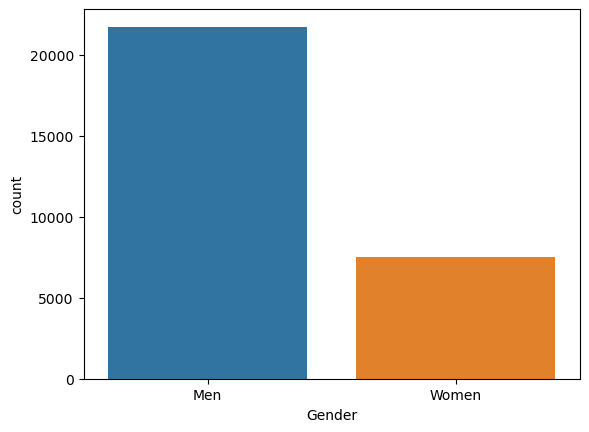

In [46]:

sns.countplot(data=df, x='Gender')

In [49]:
medals_per_city.drop("Total", axis = 0, inplace = True)

In [50]:
medals_per_city

Medal,Bronze,Gold,Silver,Total
City,,,,
Amsterdam,242,229,239,710
Antwerp,355,497,446,1298
Athens,719,723,707,2149
Atlanta,634,615,610,1859
Barcelona,596,558,551,1705
Beijing,710,669,663,2042
Berlin,282,299,294,875
Helsinki,299,300,290,889
London,479,587,552,1618


<Axes: xlabel='Gender', ylabel='count'>

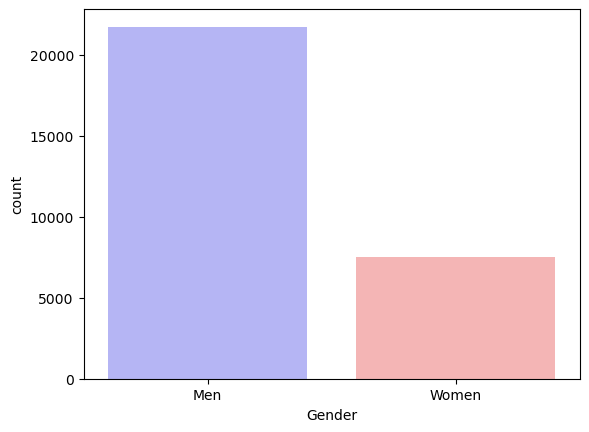

In [23]:

sns.countplot(data=df, x='Gender',palette='bwr')

# Plotting the number of Gold, Silver and Bronze medals for each gender.

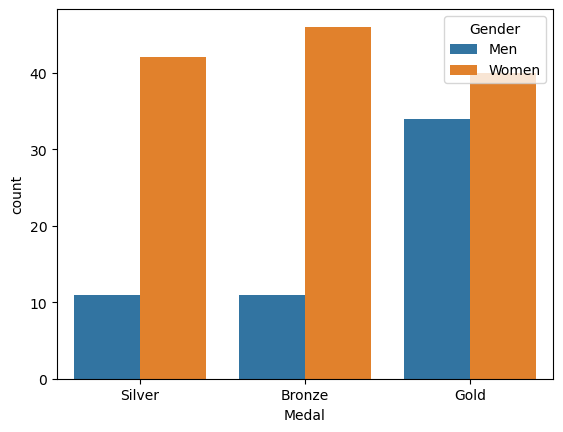

In [24]:
sns.countplot(x='Medal',data=mw, hue='Gender');

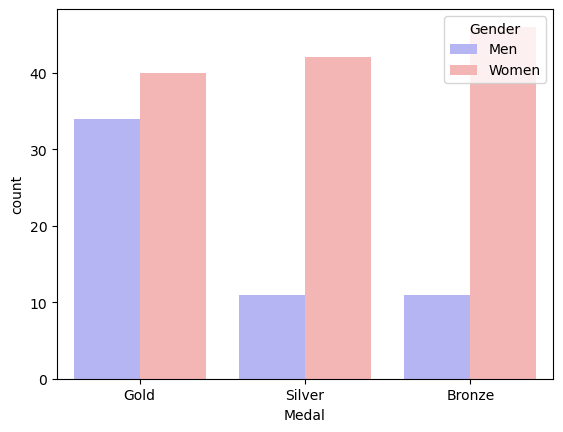

In [25]:
sns.countplot(x='Medal',data=mw, hue='Gender',palette='bwr',order=['Gold','Silver','Bronze']);

## Plotting the total number of medals awarded at each of the Olympic games throughout history.

<Axes: >

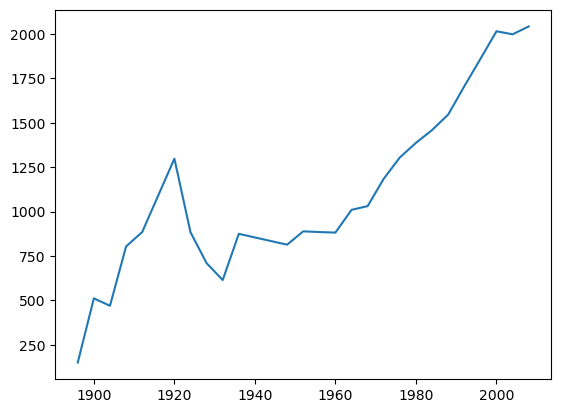

In [26]:
df.Edition.value_counts().sort_index().plot()

# Which countries did not win a medal in the 2008 Olympics? How many countries were there?

In [27]:
lo = df[df.Edition == 2008]
lo

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
27174,Beijing,2008,Aquatics,Diving,"GALPERIN, Gleb",RUS,Men,10m platform,M,Bronze
27175,Beijing,2008,Aquatics,Diving,"MITCHAM, Matthew",AUS,Men,10m platform,M,Gold
27176,Beijing,2008,Aquatics,Diving,"ZHOU, Luxin",CHN,Men,10m platform,M,Silver
27177,Beijing,2008,Aquatics,Diving,"WANG, Xin",CHN,Women,10m platform,W,Bronze
27178,Beijing,2008,Aquatics,Diving,"CHEN, Ruolin",CHN,Women,10m platform,W,Gold
...,...,...,...,...,...,...,...,...,...,...
29211,Beijing,2008,Wrestling,Wrestling Gre-R,"ENGLICH, Mirko",GER,Men,84 - 96kg,M,Silver
29212,Beijing,2008,Wrestling,Wrestling Gre-R,"MIZGAITIS, Mindaugas",LTU,Men,96 - 120kg,M,Bronze
29213,Beijing,2008,Wrestling,Wrestling Gre-R,"PATRIKEEV, Yuri",ARM,Men,96 - 120kg,M,Bronze
29214,Beijing,2008,Wrestling,Wrestling Gre-R,"LOPEZ, Mijain",CUB,Men,96 - 120kg,M,Gold


# Using groupby(), plot the total number of medals awarded at each of the Olympic games throughout history.

<Axes: xlabel='Edition'>

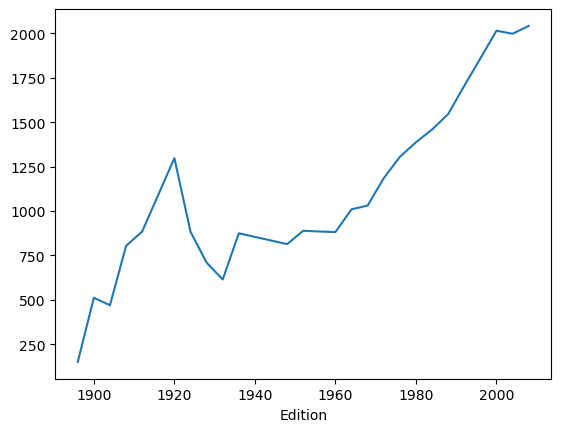

In [28]:
df.groupby('Edition').size().plot()

# Create a list showing the total number of medals won for each country over the history of the Olympics. 
# For each country, include the year of the first and most recent Olympic medal wins.

In [29]:
df.groupby('NOC').agg({'Edition' : ['count','min','max']})

Edition            
      count   min   max
NOC                    
AFG       1  2008  2008
AHO       1  1988  1988
ALG      14  1984  2008
ANZ      29  1908  1912
ARG     239  1924  2008
..      ...   ...   ...
VIE       2  2000  2008
YUG     435  1924  2000
ZAM       2  1984  1996
ZIM      23  1980  2008
ZZX      48  1896  1904

[138 rows x 3 columns]

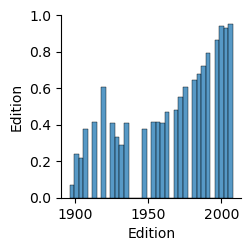

In [30]:
sns.pairplot(df)

# In which events did Jesse Owens win a medal?

In [31]:
jo = df[df.Athlete == 'OWENS, Jesse']
jo

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
6427,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,100m,M,Gold
6439,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,200m,M,Gold
6456,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,4x100m relay,M,Gold
6523,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,long jump,M,Gold


In [32]:
jo.Event.value_counts()

100m            1
200m            1
4x100m relay    1
long jump       1
Name: Event, dtype: int64

# Which country has won the most men's gold medals in singles badminton over the years? Sort the results alphabetically by the player's names.

In [33]:
gbm = df[(df.Medal == 'Gold') & (df.Gender == 'Men') & (df.Sport == 'Badminton')]
gbm.sort_values(by='Athlete').head(10)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
20045,Barcelona,1992,Badminton,Badminton,"BUDI KUSUMA, Alan",INA,Men,singles,M,Gold
23701,Sydney,2000,Badminton,Badminton,"GUNAWAN, Tony",INA,Men,doubles,M,Gold
25718,Athens,2004,Badminton,Badminton,"HA, Tae-Kwon",KOR,Men,doubles,M,Gold
25734,Athens,2004,Badminton,Badminton,"HIDAYAT, Taufik",INA,Men,singles,M,Gold
21787,Atlanta,1996,Badminton,Badminton,"HOYER-LARSEN, Poul Erik",DEN,Men,singles,M,Gold
23717,Sydney,2000,Badminton,Badminton,"JI, Xinpeng",CHN,Men,singles,M,Gold
27725,Beijing,2008,Badminton,Badminton,"KIDO, Markis",INA,Men,doubles,M,Gold
25719,Athens,2004,Badminton,Badminton,"KIM, Dong Moon",KOR,Men,doubles,M,Gold
21773,Atlanta,1996,Badminton,Badminton,"KIM, Dong Moon",KOR,Men,doubles,X,Gold
20031,Barcelona,1992,Badminton,Badminton,"KIM, Moon-Soo",KOR,Men,doubles,M,Gold


# Which three countries have won the most medals in recent years (from 1984 to 2008)?

In [34]:
rec = df[df.Edition >= 1984]
rec.NOC.value_counts().head(3)

USA    1837
AUS     762
GER     691
Name: NOC, dtype: int64

# Plotting the number of gold medals won by the USA male and female athletes throughout the history of the Olympics?

<Axes: xlabel='Edition'>

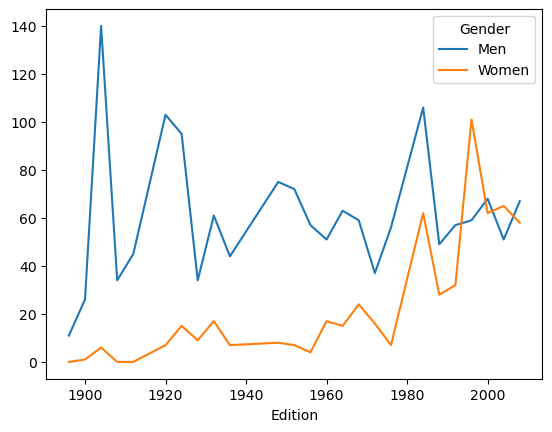

In [42]:
gu = df[(df.NOC == 'USA') & (df.Medal == 'Gold')]
gu.groupby(['Edition','Gender']).size().unstack('Gender',fill_value=0).plot()

# Plot the number of medals achieved by the Chinese team (men and women) in Beijing 2008 using:
## matplotlib
## Seaborn

In [43]:
mw = df[(df.Edition == 2008) & (df.NOC == 'CHN')]
mw.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
27176,Beijing,2008,Aquatics,Diving,"ZHOU, Luxin",CHN,Men,10m platform,M,Silver
27177,Beijing,2008,Aquatics,Diving,"WANG, Xin",CHN,Women,10m platform,W,Bronze
27178,Beijing,2008,Aquatics,Diving,"CHEN, Ruolin",CHN,Women,10m platform,W,Gold
27180,Beijing,2008,Aquatics,Diving,"QIN, Kai",CHN,Men,3m springboard,M,Bronze
27181,Beijing,2008,Aquatics,Diving,"HE, Chong",CHN,Men,3m springboard,M,Gold


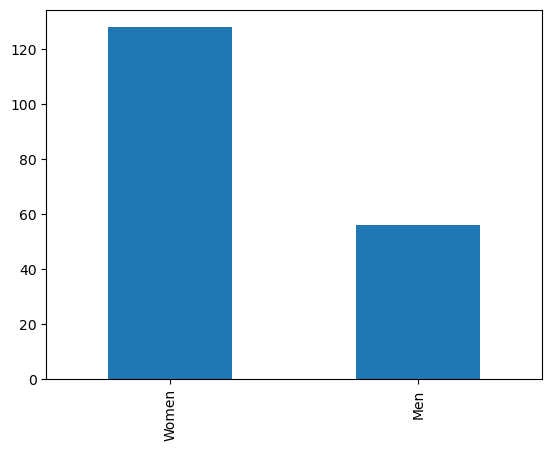

In [44]:

mw.Gender.value_counts().plot(kind='bar');

women got more medals than men 